The purpose of this study is to analyze several Instacart orders and products, to analyze customer ordering habits and hopefully boost sales once these patterns are recognized.

In [1]:
import pandas as pd

In [2]:
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')

In [3]:
products = pd.read_csv('/datasets/products.csv', sep=';')

In [4]:
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')

In [5]:
departments = pd.read_csv('/datasets/departments.csv', sep=';')

In [6]:
orderproducts = pd.read_csv('/datasets/order_products.csv', sep=';')

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [7]:
# Check for duplicated orders
duporders0 = orders.duplicated().sum()

In [8]:
wed_2am_orders = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]

print(wed_2am_orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

In [9]:
# Remove duplicate orders
order_duplicates = orders.drop_duplicates()
print()
print(order_duplicates)


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                      

In [10]:
# Double check for duplicate rows
print(order_duplicates)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [11]:
# Double check for duplicate order IDs only
print(products.columns)

Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')


In [12]:
product_duplicates = products.duplicated().sum()
print(product_duplicates)

0


### `products` data frame

In [13]:
# Check for fully duplicate rows
print(orders)
print()
print(orders.value_counts())

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [14]:
# Check for just duplicate product IDs
print(orders['order_id'].value_counts())

2125197    2
1782114    2
1286742    2
391768     2
1021560    2
          ..
1273706    1
689148     1
1752059    1
2794488    1
2047       1
Name: order_id, Length: 478952, dtype: int64


In [15]:
# Check for just duplicate product names (convert names to lowercase to compare better)
lowercase_counts = products['product_name'].str.lower().value_counts()

print(lowercase_counts)

green tea with ginseng and honey                           3
chicken in a biskit baked snack crackers                   2
half and half                                              2
aged balsamic vinegar of modena                            2
original bbq sauce                                         2
                                                          ..
beef raviolis pasta in meat sauce                          1
colorful coarse ground blend seasoned pepper               1
drinkable lowfat yogurt strawberry                         1
maple almond protein bar                                   1
better than cream cheese - plain imitation cream cheese    1
Name: product_name, Length: 48332, dtype: int64


In [16]:
# Check for duplicate product names that aren't missing
products_cleaned = products.drop_duplicates(subset=['product_name'], keep='first')
print(products_cleaned)

       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49689       49690                      HIGH PERFORMANCE ENERGY DRINK   
49690       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
49691       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
49692       49693                             SPRING WATER BODY WASH   
49693       49694                            BURRITO- STEAK & CHEESE   

       aisle_id  department_id  
0            61             19  
1           104             13  
2            94              7  
3  

### `departments` data frame

In [17]:
department_duplicates = departments.duplicated().sum()
print(department_duplicates)

0


### `aisles` data frame

In [18]:
aisle_duplicates = aisles.duplicated().sum()
print(aisle_duplicates)

0


### `order_products` data frame

In [19]:
# Check for fullly duplicate rows
orderproduct_duplicates = orderproducts.duplicated()
print(orderproduct_duplicates)

0          False
1          False
2          False
3          False
4          False
           ...  
4545002    False
4545003    False
4545004    False
4545005    False
4545006    False
Length: 4545007, dtype: bool


In [20]:
# Double check for any other tricky duplicates
orderproduct_duplicates = orderproducts.drop_duplicates(subset='product_id')
print(orderproduct_duplicates)

         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440               17.0          0
1          567889        1560                1.0          1
2         2261212       26683                1.0          1
3          491251        8670               35.0          1
4         2571142        1940                5.0          1
...           ...         ...                ...        ...
4539981    267402       45226               14.0          0
4540724   2621676       25201               10.0          0
4540999    937623       49153                2.0          0
4541048    532895        8182                1.0          0
4542909   3132243       40024                1.0          0

[45573 rows x 4 columns]


In [21]:
orderproducts[orderproducts.duplicated(subset=['order_id', 'product_id'])]

,order_id,product_id,add_to_cart_order,reordered


In [22]:
orderproduct_duplicates = orderproducts.drop_duplicates(subset='product_id')
print(orderproduct_duplicates)

         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440               17.0          0
1          567889        1560                1.0          1
2         2261212       26683                1.0          1
3          491251        8670               35.0          1
4         2571142        1940                5.0          1
...           ...         ...                ...        ...
4539981    267402       45226               14.0          0
4540724   2621676       25201               10.0          0
4540999    937623       49153                2.0          0
4541048    532895        8182                1.0          0
4542909   3132243       40024                1.0          0

[45573 rows x 4 columns]


## Find and remove missing values


### `products` data frame

In [23]:
orderproduct_dropdups = orderproducts.drop_duplicates(subset=['order_id','product_id'])
print(orderproduct_dropdups)

         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440               17.0          0
1          567889        1560                1.0          1
2         2261212       26683                1.0          1
3          491251        8670               35.0          1
4         2571142        1940                5.0          1
...           ...         ...                ...        ...
4545002    577211       15290               12.0          1
4545003   1219554       21914                9.0          0
4545004    692640       47766                4.0          1
4545005    319435         691                8.0          1
4545006   1398151       28733                9.0          0

[4545007 rows x 4 columns]


In [24]:
# Are all of the missing product names associated with aisle ID 100?
orderproduct_duplicates = orderproducts.duplicated().sum()
print(orderproduct_duplicates)

0


In [25]:
# Are all of the missing product names associated with department ID 21?
print(departments)

    department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing


In [26]:
# What is this ailse and department?
print('aisle 20: missing')

aisle 20: missing


In [27]:
# Fill missing product names with 'Unknown'
products_item = products["product_name"].fillna("Unknown")
print(products_item)

0                               Chocolate Sandwich Cookies
1                                         All-Seasons Salt
2                     Robust Golden Unsweetened Oolong Tea
3        Smart Ones Classic Favorites Mini Rigatoni Wit...
4                                Green Chile Anytime Sauce
                               ...                        
49689                        HIGH PERFORMANCE ENERGY DRINK
49690                        ORIGINAL PANCAKE & WAFFLE MIX
49691      ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692                               SPRING WATER BODY WASH
49693                              BURRITO- STEAK & CHEESE
Name: product_name, Length: 49694, dtype: object


### `orders` data frame

In [28]:
print(orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [29]:
# Are there any missing values where it's not a customer's first order?
orders_duplicated = orders.duplicated
print(orders_duplicated)

<bound method DataFrame.duplicated of         order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                  

### `order_products` data frame

In [30]:
print(orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [31]:
# What are the min and max values in this column?
min_value = orders['order_number'].min()
max_value = orders['order_number'].max()

print("Minimum value in 'order_number':", min_value)
print("Maximum value in 'order_number':", max_value)

Minimum value in 'order_number': 1
Maximum value in 'order_number': 100


In [32]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
add_to_cart_order = orders[orders.isnull().any(axis=1)]['order_id']

In [33]:
# Do all orders with missing values have more than 64 products?
orders_with_more_than_64 = add_to_cart_order[orderproducts['product_id'] > 64]

In [34]:
# Replace missing values with 999 and convert column to integer type
orders['order_id'] = orders['order_id'].astype('Int64', errors='ignore')
print(orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [35]:
order_hour = (orders['order_hour_of_day'])
order_hours_unique = (orders['order_hour_of_day']).unique()
print(order_hour)
print(order_hours_unique)
print("The order hour of the day table appears sensible.")

0         13
1         12
2         19
3         20
4         12
          ..
478962    14
478963    13
478964    11
478965     8
478966    14
Name: order_hour_of_day, Length: 478967, dtype: int64
[13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]
The order hour of the day table appears sensible.


In [36]:
order_days = (orders['order_dow'])
order_unique = (orders['order_dow']).unique()
print(order_days)
print(order_unique)
print("The order days of the week table appears sensible.")

0         6
1         5
2         5
3         0
4         4
         ..
478962    1
478963    3
478964    2
478965    3
478966    1
Name: order_dow, Length: 478967, dtype: int64
[6 5 0 4 3 1 2]
The order days of the week table appears sensible.


In [37]:
sorted(orders['order_hour_of_day'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [38]:
sorted(orders['order_dow'].unique())

[0, 1, 2, 3, 4, 5, 6]

### [A2] What time of day do people shop for groceries?

In [39]:
 print(orders['order_hour_of_day'].describe())

count    478967.000000
mean         13.446676
std           4.224986
min           0.000000
25%          10.000000
50%          13.000000
75%          16.000000
max          23.000000
Name: order_hour_of_day, dtype: float64


### [A3] What day of the week do people shop for groceries?

In [40]:
 print(orders['order_dow'].describe())

count    478967.000000
mean          2.775058
std           2.045869
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: order_dow, dtype: float64


### [A4] How long do people wait until placing another order?

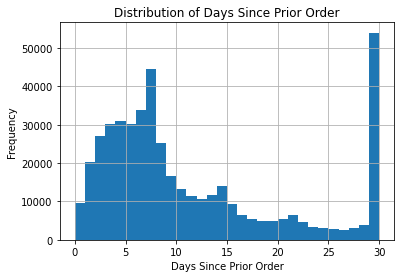

The distribution of days between orders appears informative.
Anyone looking at this trend should plan merchandising accordingly.


In [41]:
import matplotlib.pyplot as plt
orders['days_since_prior_order'].hist(bins=30)
plt.title('Distribution of Days Since Prior Order')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Frequency')
plt.show()
print("The distribution of days between orders appears informative.")
print("Anyone looking at this trend should plan merchandising accordingly.")

The distribution of days between orders appears informative.

Anyone looking at this trend should plan merchandising accordingly.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

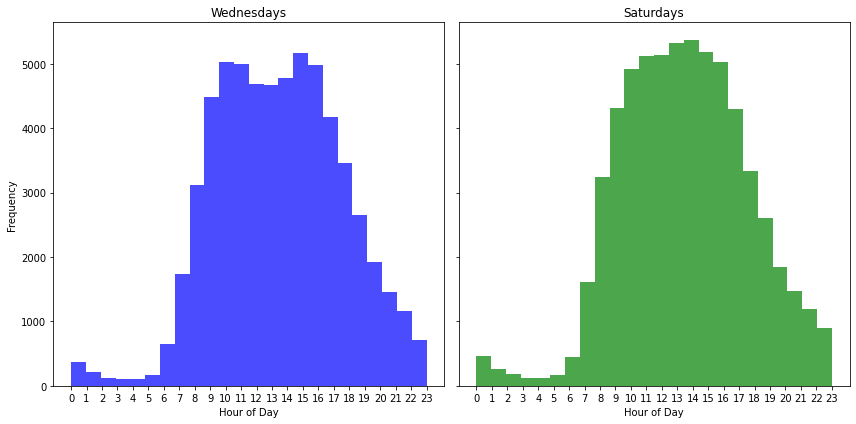

In [42]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

wednesday_orders = orders[orders['order_dow'] == 3]
ax[0].hist(wednesday_orders['order_hour_of_day'], bins=24, alpha=0.7, color='blue')
ax[0].set_title('Wednesdays')
ax[0].set_xlabel('Hour of Day')
ax[0].set_ylabel('Frequency')
ax[0].set_xticks(range(0, 24))

saturday_orders = orders[orders['order_dow'] == 6]
ax[1].hist(saturday_orders['order_hour_of_day'], bins=24, alpha=0.7, color='green')
ax[1].set_title('Saturdays')
ax[1].set_xlabel('Hour of Day')
ax[1].set_xticks(range(0, 24))

plt.tight_layout()
plt.show()


The table listed appear informative as to what hours merchandising would be most lucrative.

### [B2] What's the distribution for the number of orders per customer?

In [43]:
orders_per_customer = orders.groupby('user_id')['order_id'].size()

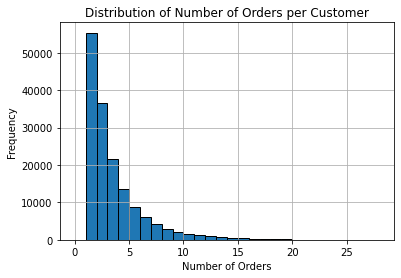

In [44]:
import matplotlib.pyplot as plt

orders_per_customer.hist(bins=range(0, orders_per_customer.max() + 1), edgecolor='k')
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.xticks(range(0, orders_per_customer.max() + 1, 5))  # Adjust the step as needed for clarity
plt.show()

The table created indicates the trend, including the maximum and minimum size of orders.

### [B3] What are the top 20 popular products (display their id and name)?

In [45]:
import pandas as pd
products = pd.read_csv('/datasets/products.csv', sep=';')
product_counts = products['product_id'].value_counts()

In [46]:
product_counts = product_counts.reset_index()
product_counts.columns = ['product_id', 'order_count']

In [47]:
top_products = pd.merge(product_counts, products, on='product_id', how="right")
top_products = top_products.sort_values('order_count', ascending=False)
print(top_products.head(20))

       product_id  order_count  \
0               1            1   
33145       33146            1   
33123       33124            1   
33124       33125            1   
33125       33126            1   
33126       33127            1   
33127       33128            1   
33128       33129            1   
33129       33130            1   
33130       33131            1   
33131       33132            1   
33132       33133            1   
33133       33134            1   
33134       33135            1   
33135       33136            1   
33136       33137            1   
33137       33138            1   
33138       33139            1   
33139       33140            1   
33140       33141            1   

                                           product_name  aisle_id  \
0                            Chocolate Sandwich Cookies        61   
33145                              Revolt Killer Citrus        64   
33123  Healthy Kids Organic Chocolate Nutritional Shake        92   
33124    

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [48]:
items_per_order = orderproducts.groupby('order_id')['product_id'].count()

In [49]:
print(items_per_order.describe())

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


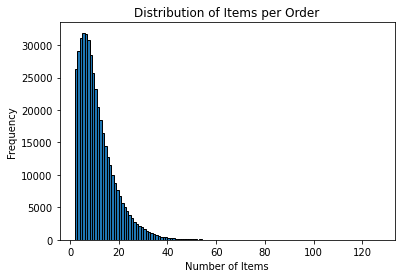

In [50]:
import matplotlib.pyplot as plt

plt.hist(items_per_order, bins=range(2, items_per_order.max()+1), edgecolor='k')
plt.title('Distribution of Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.show()

The table listed indicates the distribution pattern of items among all orders. Stakeholders should plan accordingly.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [51]:
orderproducts_dups = orderproducts.drop_duplicates(subset='order_id')
print(orderproducts_dups)
reordered_items = orderproducts_dups[orderproducts_dups['reordered'] == 1]

         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440               17.0          0
1          567889        1560                1.0          1
2         2261212       26683                1.0          1
3          491251        8670               35.0          1
4         2571142        1940                5.0          1
...           ...         ...                ...        ...
4543424   1790509       43739                1.0          1
4543722   1274005       38275                1.0          1
4543749    812418       46149                1.0          1
4544396   2666881         196                1.0          1
4544839   1461911       33198                1.0          1

[450046 rows x 4 columns]


In [52]:
reordered_counts = reordered_items['reordered'].value_counts().reset_index()
reordered_counts.columns = ['product_id', 'reordered']

In [53]:
top_reordered = pd.merge(reordered_counts, products, on='product_id')

In [54]:
top_20_reordered = top_reordered.sort_values('reordered', ascending=False).head(20)
print(top_20_reordered[['product_id', 'product_name', 'reordered']])

   product_id                product_name  reordered
0           1  Chocolate Sandwich Cookies     270159


### [C3] For each product, what proportion of its orders are reorders?

In [55]:
total_orders_per_product = orderproducts['order_id'].value_counts().reset_index()
total_orders_per_product.columns = ['order_id', 'total_orders']

In [56]:
reorders_per_product = orderproducts[orderproducts['reordered'] == 1]['order_id'].value_counts().reset_index()
reorders_per_product.columns = ['order_id', 'reorder_count']
product_reorder_stats = pd.merge(total_orders_per_product, reorders_per_product, on='order_id')
product_reorder_stats['reorder_proportion'] = product_reorder_stats['reorder_count'] / product_reorder_stats['total_orders']
print(product_reorder_stats)

        order_id  total_orders  reorder_count  reorder_proportion
0          61355           127              4            0.031496
1        3308010           115            114            0.991304
2        2136777           108             55            0.509259
3         171934           104             35            0.336538
4        1959075            98             98            1.000000
...          ...           ...            ...                 ...
395814   1510533             1              1            1.000000
395815   3339207             1              1            1.000000
395816     54659             1              1            1.000000
395817   1717983             1              1            1.000000
395818   1136563             1              1            1.000000

[395819 rows x 4 columns]


In [57]:
print("We can clearly see the patterns in what people reorder with the above table, including one hundred percent of several orders.")

We can clearly see the patterns in what people reorder with the above table, including one hundred percent of several orders.


### [C4] For each customer, what proportion of their products ordered are reorders?

In [58]:
product_reorder_stats['reorder_proportion'] = product_reorder_stats['reorder_count'] / product_reorder_stats['total_orders']

In [59]:
total_orders_per_product = orderproducts['order_id'].value_counts().reset_index()
total_orders_per_product.columns = ['order_id', 'total_orders']

reorders_per_product = orderproducts[orderproducts['reordered'] == 1]['order_id'].value_counts().reset_index()
reorders_per_product.columns = ['order_id', 'reorder_count']

product_reorder_stats = pd.merge(total_orders_per_product, reorders_per_product, on='order_id')

product_reorder_stats['reorder_proportion'] = product_reorder_stats['reorder_count'] / product_reorder_stats['total_orders']
print(product_reorder_stats)

        order_id  total_orders  reorder_count  reorder_proportion
0          61355           127              4            0.031496
1        3308010           115            114            0.991304
2        2136777           108             55            0.509259
3         171934           104             35            0.336538
4        1959075            98             98            1.000000
...          ...           ...            ...                 ...
395814   1510533             1              1            1.000000
395815   3339207             1              1            1.000000
395816     54659             1              1            1.000000
395817   1717983             1              1            1.000000
395818   1136563             1              1            1.000000

[395819 rows x 4 columns]


### [C5] What are the top 20 items that people put in their carts first? 

In [60]:
product_reorder_stats['reorder_proportion'] = product_reorder_stats['reorder_count'] / product_reorder_stats['total_orders']

In [61]:
first_added_items = orderproducts[orderproducts['add_to_cart_order'] == 1]

top_first_added = first_added_items['product_id'].value_counts().head(20).reset_index()


top_first_added.columns = ['product_id', 'count_first_added']

print(top_first_added)



    product_id  count_first_added
0        24852              15562
1        13176              11026
2        27845               4363
3        21137               3946
4        47209               3390
5        21903               3336
6        47766               3044
7        19660               2336
8        16797               2308
9        27966               2024
10       44632               1914
11       49235               1797
12       47626               1737
13         196               1733
14       38689               1397
15       26209               1370
16       12341               1340
17        5785               1310
18       27086               1309
19       22935               1246


Overall we can see the ordering and item distribution patterns of the select Instacart orders indicated. This can help plan when and which items hold priority.